In [64]:
#DataFrames and operations imports
import pandas as pd
import numpy as np

#To convert Currency Rates
from forex_python.converter import CurrencyRates 

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#use this comand to be able to plot in the notebook
%matplotlib inline

#Datetime format conversion
import datetime

#to conver tickers in plot
from matplotlib.ticker import FuncFormatter

In [65]:
#Import the data.

filePath = pd.ExcelFile('StarterBook.xlsx')
kickstarter_df = filePath.parse('Sheet1')
kickstarter_df.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,False,182,True,film & video/television
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,False,79,True,film & video/television
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,False,35,True,film & video/television
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,False,150,True,film & video/television
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,False,284,True,film & video/television


In [66]:
#Convert the goals and pledged to the same currency by building a dictionary of currencies from FOREX

#List of unique currencies.

currencyList = kickstarter_df['currency'].unique()

#Dictionary build up.

conversionFactor_dict = {}
c = CurrencyRates()
for i in (currencyList):
    conversionFactor_dict.update({i : c.convert(i, 'USD', 1)})
    
#Currenty to Dollars conversion factor dictionary.   

conversionFactor_dict 

{'USD': 1.0,
 'GBP': 1.2568348959,
 'AUD': 0.6875921376,
 'EUR': 1.1194,
 'NZD': 0.638489619,
 'CAD': 0.7377578594,
 'HKD': 0.1290270526,
 'DKK': 0.1501603016,
 'NOK': 0.104835311,
 'SEK': 0.1070294871,
 'MXN': 0.0461091065,
 'CHF': 1.0371537107,
 'SGD': 0.7149974451}

In [67]:
#Creates 2 columns using list comprehension to populate the currencies in dollars.

kickstarter_df['Goal USD'] = [ round(kickstarter_df.iloc[i, 3] * conversionFactor_dict[kickstarter_df.iloc[i, 7]],2) for i in range(len(kickstarter_df))]
kickstarter_df['Pledged USD'] = [ round(kickstarter_df.iloc[i, 4] * conversionFactor_dict[kickstarter_df.iloc[i, 7]],2)  for i in range(len(kickstarter_df))]

kickstarter_df.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Goal USD,Pledged USD
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,False,182,True,film & video/television,8500.00,11633.00
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,False,79,True,film & video/television,10275.00,14653.00
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,False,35,True,film & video/television,628.42,659.84
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,False,150,True,film & video/television,10000.00,10390.00
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,False,284,True,film & video/television,44000.00,54116.28


In [68]:
#Create a % funded column

kickstarter_df['% Funded'] = [round((kickstarter_df.iloc[i, 15] / kickstarter_df.iloc[i,14]), 2) for i in range(len(kickstarter_df))]

kickstarter_df.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Goal USD,Pledged USD,% Funded
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,False,182,True,film & video/television,8500.00,11633.00,1.37
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,False,79,True,film & video/television,10275.00,14653.00,1.43
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,False,35,True,film & video/television,628.42,659.84,1.05
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,False,150,True,film & video/television,10000.00,10390.00,1.04
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,False,284,True,film & video/television,44000.00,54116.28,1.23


In [69]:
#Average donation using if and else condition to avoid div by 0

kickstarter_df['Average Donation'] = [ round(kickstarter_df.iloc[i, 15] / kickstarter_df.iloc[i,11], 2) if kickstarter_df.iloc[i,11] != 0 else 0 for i in range(len(kickstarter_df))]

kickstarter_df.head()


,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Goal USD,Pledged USD,% Funded,Average Donation
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,False,182,True,film & video/television,8500.00,11633.00,1.37,63.92
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,False,79,True,film & video/television,10275.00,14653.00,1.43,185.48
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,False,35,True,film & video/television,628.42,659.84,1.05,18.85
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,False,150,True,film & video/television,10000.00,10390.00,1.04,69.27
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,False,284,True,film & video/television,44000.00,54116.28,1.23,190.55


In [70]:
#Separate the text into category and sub category

kickstarter_df[['Category', 'Sub-Category']] = kickstarter_df.iloc[:, 13].str.split('/', expand = True)

kickstarter_df.head()

,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,staff_pick,backers_count,spotlight,Category and Sub-Category,Goal USD,Pledged USD,% Funded,Average Donation,Category,Sub-Category
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,False,182,True,film & video/television,8500.00,11633.00,1.37,63.92,film & video,television
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,False,79,True,film & video/television,10275.00,14653.00,1.43,185.48,film & video,television
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,False,35,True,film & video/television,628.42,659.84,1.05,18.85,film & video,television
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,False,150,True,film & video/television,10000.00,10390.00,1.04,69.27,film & video,television
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,False,284,True,film & video/television,44000.00,54116.28,1.23,190.55,film & video,television


In [71]:
#convert date from UNIX format to a datetime. Unix in this case is unit Seconds.

kickstarter_df['Deadline Date'] = pd.to_datetime(kickstarter_df['deadline'], unit = 's')
kickstarter_df['Launched Date'] = pd.to_datetime(kickstarter_df['launched_at'], unit = 's')

kickstarter_df['Days on Platform'] = kickstarter_df['Deadline Date'] - kickstarter_df['Launched Date']

kickstarter_df.head()


,id,name,blurb,goal,pledged,state,country,currency,deadline,launched_at,...,Category and Sub-Category,Goal USD,Pledged USD,% Funded,Average Donation,Category,Sub-Category,Deadline Date,Launched Date,Days on Platform
0,0,GIRLS STATE a new musical comedy TV project,"In this new TV show ""All Politics is Vocal"" as...",8500.0,11633.00,successful,US,USD,1437620400,1434931811,...,film & video/television,8500.00,11633.00,1.37,63.92,film & video,television,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49
1,1,FannibalFest Fan Convention,A Hannibal TV Show Fan Convention and Art Coll...,10275.0,14653.00,successful,US,USD,1488464683,1485872683,...,film & video/television,10275.00,14653.00,1.43,185.48,film & video,television,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00
2,2,Charlie teaser completion,Completion fund for post-production for teaser...,500.0,525.00,successful,GB,GBP,1455555083,1454691083,...,film & video/television,628.42,659.84,1.05,18.85,film & video,television,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00
3,3,Unsure/Positive: A Dramedy Series About Life w...,We already produced the *very* beginning of th...,10000.0,10390.00,successful,US,USD,1407414107,1404822107,...,film & video/television,10000.00,10390.00,1.04,69.27,film & video,television,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00
4,4,Party Monsters,19th centuryâ€™s most notorious literary chara...,44000.0,54116.28,successful,US,USD,1450555279,1447963279,...,film & video/television,44000.00,54116.28,1.23,190.55,film & video,television,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00


In [72]:
#View of the outcome of the projects.

kickstarter_df['state'].value_counts()

successful    2185
failed        1530
canceled       349
live            50
Name: state, dtype: int64

In [73]:
#Rename Failed and Canceled projects as unsuccesful and and drop live projects

for i in range(len(kickstarter_df)) :
    if (kickstarter_df.iloc[i, 5] == 'failed') | (kickstarter_df.iloc[i, 5] == 'canceled'):
        kickstarter_df.iloc[i, 5] = 'unsuccessful'

#Create an organized DataFrame to analyse.       
organizedkickstarter_df = kickstarter_df.drop(kickstarter_df[kickstarter_df['state'] == 'live'].index)

#View of the outcome of the projects.
organizedkickstarter_df['state'].value_counts()

successful      2185
unsuccessful    1879
Name: state, dtype: int64

In [74]:
#view column names

organizedkickstarter_df.columns

Index(['id', 'name', 'blurb', 'goal', 'pledged', 'state', 'country',
       'currency', 'deadline', 'launched_at', 'staff_pick', 'backers_count',
       'spotlight', 'Category and Sub-Category', 'Goal USD', 'Pledged USD',
       '% Funded', 'Average Donation', 'Category', 'Sub-Category',
       'Deadline Date', 'Launched Date', 'Days on Platform'],
      dtype='object')

In [75]:
#Reorganize DataFrame and drop columns that are not needed.

organizedkickstarter_df = organizedkickstarter_df[['Category', 'Sub-Category', 'country', 'Deadline Date', 'Launched Date', 'Days on Platform', 'state', 'Pledged USD', 'Goal USD', 'backers_count', '% Funded', 'Average Donation', 'spotlight', 'staff_pick']]

organizedkickstarter_df.head()

,Category,Sub-Category,country,Deadline Date,Launched Date,Days on Platform,state,Pledged USD,Goal USD,backers_count,% Funded,Average Donation,spotlight,staff_pick
0,film & video,television,US,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49,successful,11633.00,8500.00,182,1.37,63.92,True,False
1,film & video,television,US,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00,successful,14653.00,10275.00,79,1.43,185.48,True,False
2,film & video,television,GB,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00,successful,659.84,628.42,35,1.05,18.85,True,False
3,film & video,television,US,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00,successful,10390.00,10000.00,150,1.04,69.27,True,False
4,film & video,television,US,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00,successful,54116.28,44000.00,284,1.23,190.55,True,False


<font size="5">Category statistical analysis.</font>

In [76]:
#Statistical Analysis on the % funded data.

def IQR (row):
    return row[6] - row[4]

def Lbound (row):
    return row[4] - (row[10] * 1.5) 

def Ubound (row):
    return row[6] + (row[10] * 1.5)

dataPctFundedCat = organizedkickstarter_df

groupedPctFundedCat = dataPctFundedCat.groupby(['Category'])

percentFundedStatsCat_df = groupedPctFundedCat['% Funded'].describe()

percentFundedStatsCat_df['median'] = groupedPctFundedCat['% Funded'].median()

percentFundedStatsCat_df['variance'] = groupedPctFundedCat['% Funded'].var()

percentFundedStatsCat_df['IQR'] = percentFundedStatsCat_df.apply(IQR, axis = 1)

percentFundedStatsCat_df['Lower Bound'] = percentFundedStatsCat_df.apply(Lbound, axis = 1)

percentFundedStatsCat_df['Upper Bound'] = percentFundedStatsCat_df.apply(Ubound, axis = 1)

percentFundedStatsCat_df['Kurtosis'] = groupedPctFundedCat['% Funded'].apply(pd.DataFrame.kurt)

percentFundedStatsCat_df['Skew'] = groupedPctFundedCat['% Funded'].apply(pd.DataFrame.skew)

percentFundedStatsCat_df

,count,mean,std,min,25%,50%,75%,max,median,variance,IQR,Lower Bound,Upper Bound,Kurtosis,Skew
Category,,,,,,,,,,,,,,,
film & video,520.0,0.792577,1.327342,0.0,0.0100,1.010,1.1300,27.02,1.010,1.761836,1.1200,-1.67000,2.81000,294.370298,14.979159
food,194.0,0.318660,0.786463,0.0,0.0000,0.000,0.1100,5.26,0.000,0.618524,0.1100,-0.16500,0.27500,18.373647,3.870938
games,220.0,44.016273,627.068191,0.0,0.0000,0.080,1.5325,9302.50,0.080,393214.516576,1.5325,-2.29875,3.83125,219.984228,14.831604
journalism,24.0,0.046667,0.193361,0.0,0.0000,0.000,0.0100,0.95,0.000,0.037388,0.0100,-0.01500,0.02500,23.465319,4.824220
music,680.0,5.526868,116.476778,0.0,1.0000,1.060,1.2400,3038.33,1.060,13566.839918,0.2400,0.64000,1.60000,679.934276,26.074924
photography,220.0,0.856318,1.142570,0.0,0.0400,0.505,1.1525,8.85,0.505,1.305466,1.1125,-1.62875,2.82125,17.795346,3.408134
publishing,237.0,0.559747,1.085837,0.0,0.0000,0.070,1.0600,11.82,0.070,1.179041,1.0600,-1.59000,2.65000,52.887834,5.944171
technology,600.0,39.252350,922.748966,0.0,0.0075,0.150,1.2400,22603.00,0.150,851465.654972,1.2325,-1.84125,3.08875,599.869328,24.490925
theater,1369.0,0.824777,1.836087,0.0,0.0900,1.010,1.1100,64.83,1.010,3.371214,1.0200,-1.44000,2.64000,1081.244727,31.023230


In [77]:
#Backers Category Stats.

def IQR (row):
    return row[6] - row[4]

def Lbound (row):
    return row[4] - (row[10] * 1.5) 

def Ubound (row):
    return row[6] + (row[10] * 1.5)

dataPctFundedBack = organizedkickstarter_df

groupedPctFundedBack = dataPctFundedBack.groupby(['Category'])

percentFundedStatsBack_df = groupedPctFundedBack['% Funded'].describe()

percentFundedStatsBack_df['median'] = groupedPctFundedBack['% Funded'].median()

percentFundedStatsBack_df['variance'] = groupedPctFundedBack['% Funded'].var()

percentFundedStatsBack_df['IQR'] = percentFundedStatsBack_df.apply(IQR, axis = 1)

percentFundedStatsBack_df['Lower Bound'] = percentFundedStatsBack_df.apply(Lbound, axis = 1)

percentFundedStatsBack_df['Upper Bound'] = percentFundedStatsBack_df.apply(Ubound, axis = 1)

percentFundedStatsBack_df['Kurtosis'] = groupedPctFundedBack['% Funded'].apply(pd.DataFrame.kurt)

percentFundedStatsBack_df['Skew'] = groupedPctFundedBack['% Funded'].apply(pd.DataFrame.skew)

percentFundedStatsBack_df

,count,mean,std,min,25%,50%,75%,max,median,variance,IQR,Lower Bound,Upper Bound,Kurtosis,Skew
Category,,,,,,,,,,,,,,,
film & video,520.0,0.792577,1.327342,0.0,0.0100,1.010,1.1300,27.02,1.010,1.761836,1.1200,-1.67000,2.81000,294.370298,14.979159
food,194.0,0.318660,0.786463,0.0,0.0000,0.000,0.1100,5.26,0.000,0.618524,0.1100,-0.16500,0.27500,18.373647,3.870938
games,220.0,44.016273,627.068191,0.0,0.0000,0.080,1.5325,9302.50,0.080,393214.516576,1.5325,-2.29875,3.83125,219.984228,14.831604
journalism,24.0,0.046667,0.193361,0.0,0.0000,0.000,0.0100,0.95,0.000,0.037388,0.0100,-0.01500,0.02500,23.465319,4.824220
music,680.0,5.526868,116.476778,0.0,1.0000,1.060,1.2400,3038.33,1.060,13566.839918,0.2400,0.64000,1.60000,679.934276,26.074924
photography,220.0,0.856318,1.142570,0.0,0.0400,0.505,1.1525,8.85,0.505,1.305466,1.1125,-1.62875,2.82125,17.795346,3.408134
publishing,237.0,0.559747,1.085837,0.0,0.0000,0.070,1.0600,11.82,0.070,1.179041,1.0600,-1.59000,2.65000,52.887834,5.944171
technology,600.0,39.252350,922.748966,0.0,0.0075,0.150,1.2400,22603.00,0.150,851465.654972,1.2325,-1.84125,3.08875,599.869328,24.490925
theater,1369.0,0.824777,1.836087,0.0,0.0900,1.010,1.1100,64.83,1.010,3.371214,1.0200,-1.44000,2.64000,1081.244727,31.023230


In [78]:
#Statistical Analysis on the % funded data.

def IQR (row):
    return row[6] - row[4]

def Lbound (row):
    return row[4] - (row[10] * 1.5) 

def Ubound (row):
    return row[6] + (row[10] * 1.5)

dataPctFunded = organizedkickstarter_df

groupedPctFunded_df = dataPctFunded.groupby(['Sub-Category'])

percentFundedStats_df = groupedPctFunded_df['% Funded'].describe()

percentFundedStats_df['median'] = groupedPctFunded_df['% Funded'].median()

percentFundedStats_df['variance'] = groupedPctFunded_df['% Funded'].var()

percentFundedStats_df['IQR'] = percentFundedStats_df.apply(IQR, axis = 1)

percentFundedStats_df['Lower Bound'] = percentFundedStats_df.apply(Lbound, axis = 1)

percentFundedStats_df['Upper Bound'] = percentFundedStats_df.apply(Ubound, axis = 1)

percentFundedStats_df['Kurtosis'] = groupedPctFunded_df['% Funded'].apply(pd.DataFrame.kurt)

percentFundedStats_df['Skew'] = groupedPctFunded_df['% Funded'].apply(pd.DataFrame.skew)

percentFundedStats_df

,count,mean,std,min,25%,50%,75%,max,median,variance,IQR,Lower Bound,Upper Bound,Kurtosis,Skew
Sub-Category,,,,,,,,,,,,,,,
animation,100.0,0.050300,0.107445,0.00,0.0000,0.005,0.0350,0.64,0.005,1.154435e-02,0.0350,-0.05250,0.08750,12.132866,3.247808
art books,20.0,0.073000,0.106381,0.00,0.0100,0.020,0.1150,0.41,0.020,1.131684e-02,0.1050,-0.14750,0.27250,4.414133,2.044356
audio,24.0,0.046667,0.193361,0.00,0.0000,0.000,0.0100,0.95,0.000,3.738841e-02,0.0100,-0.01500,0.02500,23.465319,4.824220
children's books,40.0,0.078000,0.115873,0.00,0.0000,0.010,0.1125,0.52,0.010,1.342667e-02,0.1125,-0.16875,0.28125,4.320484,1.956313
classical music,40.0,1.130250,0.197101,1.00,1.0200,1.065,1.1300,1.95,1.065,3.884865e-02,0.1100,0.85500,1.29500,7.803414,2.695175
documentary,180.0,1.243056,0.406912,1.00,1.0400,1.100,1.2500,3.85,1.100,1.655778e-01,0.2100,0.72500,1.56500,13.967624,3.410209
drama,80.0,0.097750,0.160931,0.00,0.0000,0.000,0.1600,0.60,0.000,2.589867e-02,0.1600,-0.24000,0.40000,1.995058,1.717417
electronic music,40.0,1.624000,1.147340,1.00,1.0525,1.145,1.5300,7.04,1.145,1.316389e+00,0.4775,0.33625,2.24625,12.513419,3.232111
faith,40.0,0.078000,0.164211,0.00,0.0000,0.005,0.0800,0.68,0.005,2.696513e-02,0.0800,-0.12000,0.20000,7.433328,2.791659


In [79]:
#Statistical anlaysis on the backers count data

def IQR (row):
    return row[6] - row[4]

def Lbound (row):
    return row[4] - (row[10] * 1.5) 

def Ubound (row):
    return row[6] + (row[10] * 1.5)

grouped_df = organizedkickstarter_df.groupby(['Sub-Category'])

backerCountStats_df = grouped_df['backers_count'].describe()

backerCountStats_df['median'] = grouped_df['backers_count'].median()

backerCountStats_df['variance'] = grouped_df['backers_count'].var()

backerCountStats_df['IQR'] = backerCountStats_df.apply(IQR, axis = 1)

backerCountStats_df['Lower Bound'] = backerCountStats_df.apply(Lbound, axis = 1)

backerCountStats_df['Upper Bound'] = backerCountStats_df.apply(Ubound, axis = 1)

backerCountStats_df['Kurtosis'] = grouped_df['backers_count'].apply(pd.DataFrame.kurt)

backerCountStats_df['Skew'] = grouped_df['backers_count'].apply(pd.DataFrame.skew)

backerCountStats_df

,count,mean,std,min,25%,50%,75%,max,median,variance,IQR,Lower Bound,Upper Bound,Kurtosis,Skew
Sub-Category,,,,,,,,,,,,,,,
animation,100.0,14.060000,32.316872,0.0,0.00,3.0,10.25,170.0,3.0,1.044380e+03,10.25,-15.375,25.625,11.446975,3.409325
art books,20.0,11.000000,17.537929,0.0,1.00,3.0,10.75,59.0,3.0,3.075789e+02,9.75,-13.625,25.375,3.018382,1.991056
audio,24.0,13.125000,59.430129,0.0,0.00,0.0,1.00,292.0,0.0,3.531940e+03,1.00,-1.500,2.500,23.944896,4.890976
children's books,40.0,8.975000,12.435449,0.0,1.00,3.5,14.25,49.0,3.5,1.546404e+02,13.25,-18.875,34.125,2.132688,1.690172
classical music,40.0,56.300000,41.461258,4.0,26.75,52.0,68.00,185.0,52.0,1.719036e+03,41.25,-35.125,129.875,1.759396,1.369805
documentary,180.0,256.905556,335.339296,7.0,73.75,162.0,292.00,2436.0,162.0,1.124524e+05,218.25,-253.625,619.375,16.670242,3.601584
drama,80.0,22.562500,144.507881,0.0,0.00,1.5,7.00,1293.0,1.5,2.088253e+04,7.00,-10.500,17.500,78.468600,8.820818
electronic music,40.0,123.975000,202.977009,1.0,27.00,70.5,122.25,1071.0,70.5,4.119967e+04,95.25,-115.875,265.125,13.483624,3.518406
faith,40.0,4.275000,7.524277,0.0,0.00,1.5,4.00,41.0,1.5,5.661474e+01,4.00,-6.000,10.000,14.349230,3.407049


In [80]:
#List comprehension to cap outliers in %funded

cappedKickstarted_df = organizedkickstarter_df

cappedKickstarted_df['Capped Funded'] = [percentFundedStats_df.loc[organizedkickstarter_df.iloc[i,1],'Upper Bound'] if organizedkickstarter_df.iloc[i,10] > percentFundedStats_df.loc[organizedkickstarter_df.iloc[i,1],'Upper Bound'] else organizedkickstarter_df.iloc[i,10] for i in range(len(organizedkickstarter_df))]

cappedKickstarted_df.head()


,Category,Sub-Category,country,Deadline Date,Launched Date,Days on Platform,state,Pledged USD,Goal USD,backers_count,% Funded,Average Donation,spotlight,staff_pick,Capped Funded
0,film & video,television,US,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49,successful,11633.00,8500.00,182,1.37,63.92,True,False,1.37
1,film & video,television,US,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00,successful,14653.00,10275.00,79,1.43,185.48,True,False,1.43
2,film & video,television,GB,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00,successful,659.84,628.42,35,1.05,18.85,True,False,1.05
3,film & video,television,US,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00,successful,10390.00,10000.00,150,1.04,69.27,True,False,1.04
4,film & video,television,US,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00,successful,54116.28,44000.00,284,1.23,190.55,True,False,1.23


In [81]:
#List comprehension to cap outliers in backers count

cappedKickstarted_df['Capped Backers'] = [backerCountStats_df.loc[organizedkickstarter_df.iloc[i,1],'Upper Bound'] if organizedkickstarter_df.iloc[i,9] > backerCountStats_df.loc[organizedkickstarter_df.iloc[i,1],'Upper Bound'] else organizedkickstarter_df.iloc[i,9] for i in range(len(organizedkickstarter_df))]

cappedKickstarted_df.head()

,Category,Sub-Category,country,Deadline Date,Launched Date,Days on Platform,state,Pledged USD,Goal USD,backers_count,% Funded,Average Donation,spotlight,staff_pick,Capped Funded,Capped Backers
0,film & video,television,US,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49,successful,11633.00,8500.00,182,1.37,63.92,True,False,1.37,182.000
1,film & video,television,US,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00,successful,14653.00,10275.00,79,1.43,185.48,True,False,1.43,79.000
2,film & video,television,GB,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00,successful,659.84,628.42,35,1.05,18.85,True,False,1.05,35.000
3,film & video,television,US,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00,successful,10390.00,10000.00,150,1.04,69.27,True,False,1.04,150.000
4,film & video,television,US,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00,successful,54116.28,44000.00,284,1.23,190.55,True,False,1.23,214.875


In [82]:
#Projects per country

projectsCountry = cappedKickstarted_df['country'].value_counts()

totalProjects = cappedKickstarted_df['country'].value_counts().sum()

pctCountry = round(projectsCountry/totalProjects,4) * 100

pctCountry

US    73.94
GB    14.67
CA     3.57
AU     1.82
DE     1.30
IT     0.71
FR     0.62
ES     0.52
SE     0.52
NL     0.49
DK     0.34
IE     0.34
NZ     0.30
MX     0.22
NO     0.17
CH     0.15
AT     0.12
HK     0.07
BE     0.05
LU     0.05
SG     0.02
Name: country, dtype: float64

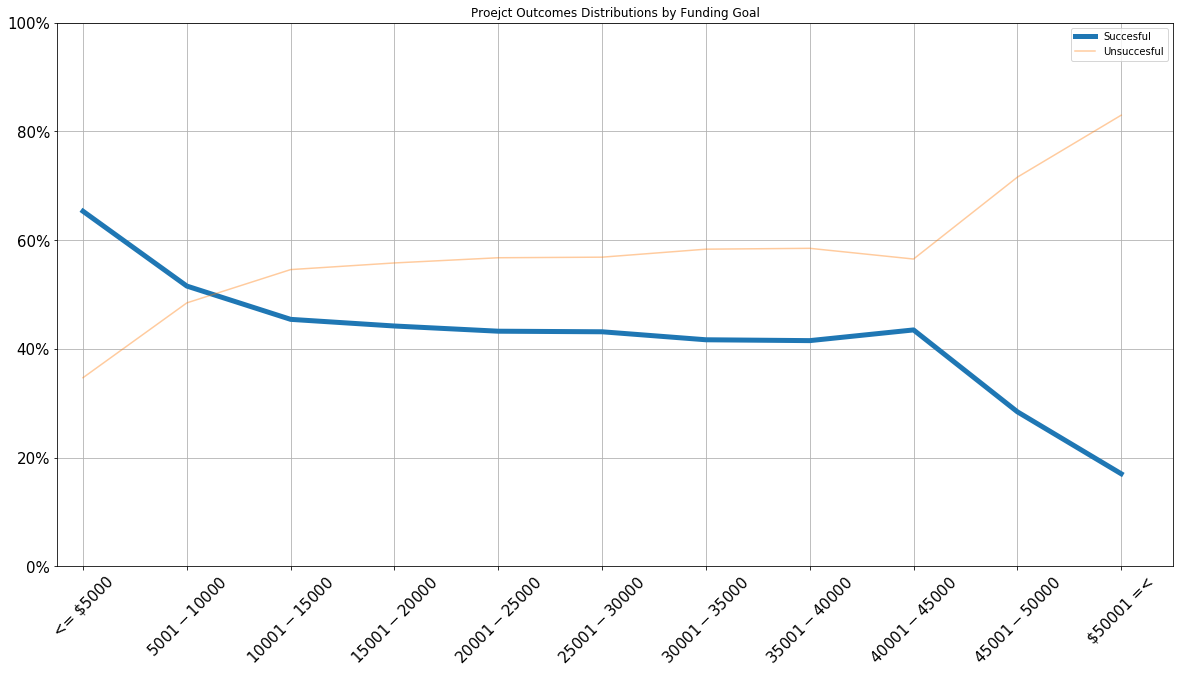

In [83]:
#Create the bins.
binArray = np.arange(0,55000,5000)
binsTarget = np.append(np.arange(0,55000,5000),int(cappedKickstarted_df['Goal USD'].max()))

#Create the names of the labels
namebinsLowTarget = np.arange(0,55000,5000)
namebinsHighTarget = np.arange(5000,60000,5000)
namebinsTarget = [f'${i+1} - ${j}' for i,j in zip(namebinsLowTarget, namebinsHighTarget)]
namebinsTarget[0] ='<= $5000'
namebinsTarget[-1] = '$50001 =<'
namebinsTarget

#use .cut to classify data
cappedKickstarted_df['Goal Bins'] = pd.cut(cappedKickstarted_df['Goal USD'], binsTarget, labels = namebinsTarget, include_lowest = True)

#Counts and count total
goalDistribution_succesfulCount = cappedKickstarted_df[cappedKickstarted_df['state'] == 'successful'].groupby('Goal Bins')['country'].count()
goalDistribution_unsuccesfulCount = cappedKickstarted_df[cappedKickstarted_df['state'] == 'unsuccessful'].groupby('Goal Bins')['country'].count()
goalDistribution_total = goalDistribution_succesfulCount + goalDistribution_unsuccesfulCount

#Percent calcualtion
goalDistribution_succesfulPct = goalDistribution_succesfulCount / goalDistribution_total * 100
goalDistribution_unsuccesfulPct = goalDistribution_unsuccesfulCount / goalDistribution_total * 100

#Plot.

#X axis lenght.
x_axis = np.arange(len(namebinsTarget))

#Loation of the ticks from the length of the x axis
ticks_loc = [i for i in x_axis]

#Creates a figure with the size 20x10
plt.figure(figsize = (20,10))

#Plot data.
plt.plot(x_axis,
         goalDistribution_succesfulPct,
        linewidth = 5,
        label = 'Succesful')
plt.plot(x_axis,
         goalDistribution_unsuccesfulPct,
        alpha = 0.4,
        label = 'Unsuccesful')

#Legend location.
plt.legend(loc = 'best')

#Renames x ticks using the location and names.
plt.xticks(ticks_loc,
           namebinsTarget,
           fontsize = 15,
           rotation = '45')
plt.yticks(fontsize = 15)

#Y axis format.
plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

#Limits for x and y
plt.ylim(0,(goalDistribution_succesfulPct + goalDistribution_unsuccesfulPct).max())

plt.xlim(-0.25, len(x_axis)-0.5)

#Title
plt.title('Proejct Outcomes Distributions by Funding Goal')

#Grid.
plt.grid()


In [84]:
#Note days on platform is a timedelta data type.

cappedKickstarted_df.dtypes


Category                     object
Sub-Category                 object
country                      object
Deadline Date        datetime64[ns]
Launched Date        datetime64[ns]
Days on Platform    timedelta64[ns]
state                        object
Pledged USD                 float64
Goal USD                    float64
backers_count                 int64
% Funded                    float64
Average Donation            float64
spotlight                      bool
staff_pick                     bool
Capped Funded               float64
Capped Backers              float64
Goal Bins                  category
dtype: object

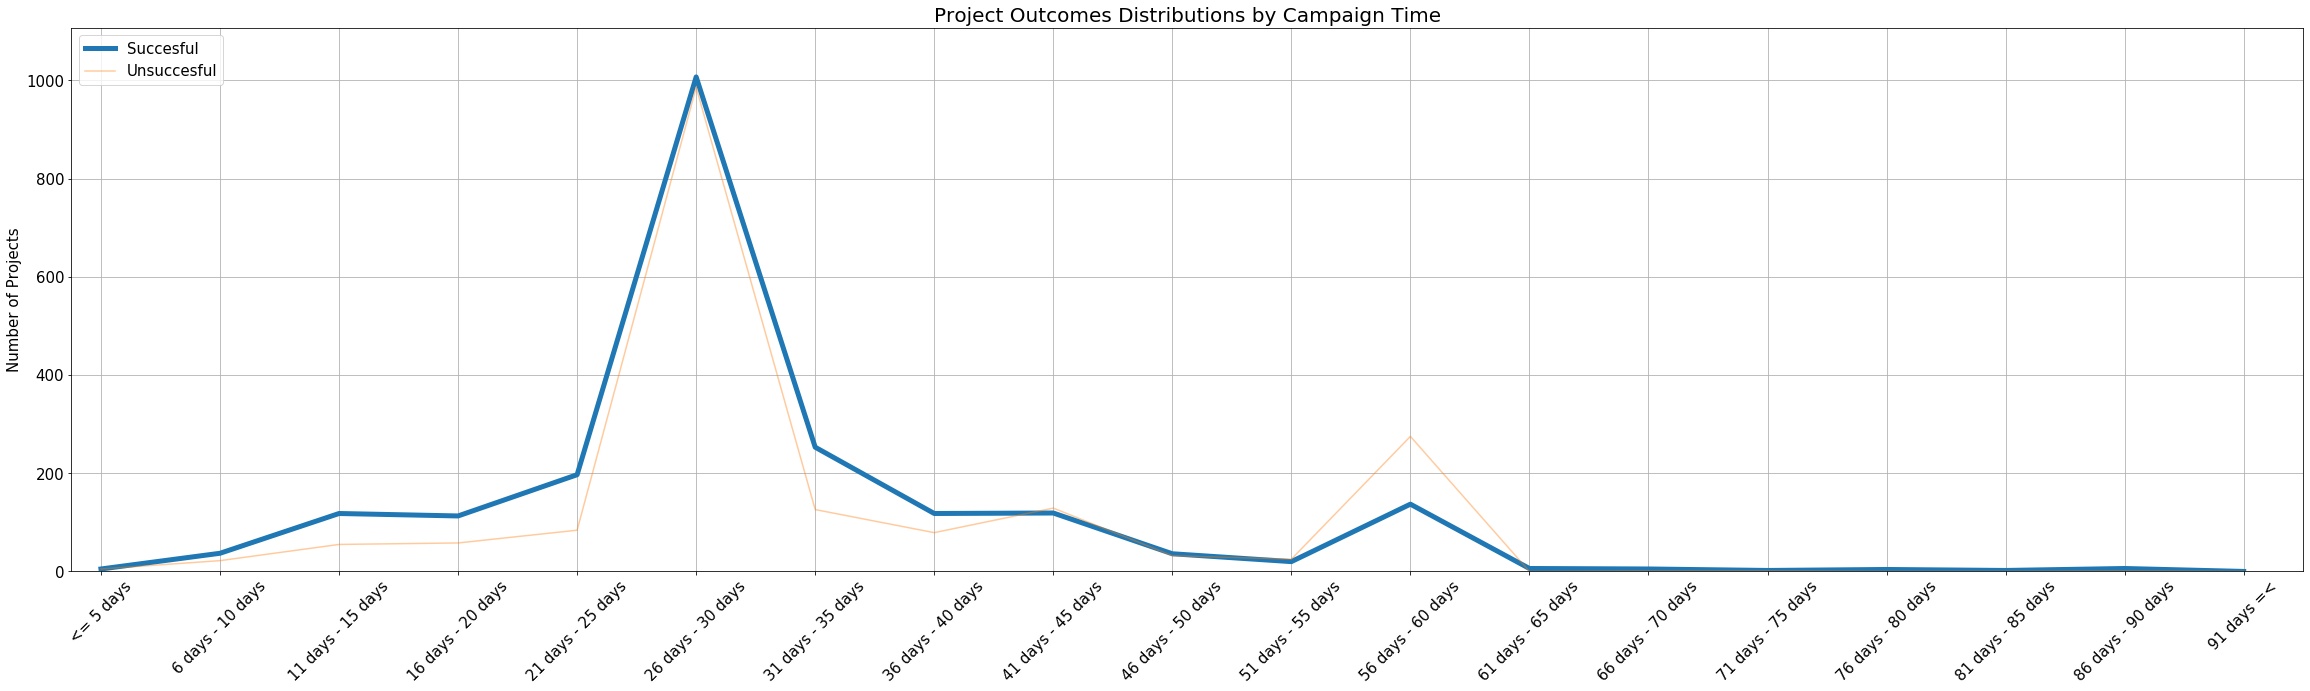

In [85]:
#Plot of project outcome by deadline.

#Create the bins
binsTime = np.arange(0,100,5)
 
#Create the names of the labels
namebinsLowTime = np.arange(0,95,5)
namebinsHighTime = np.arange(5,100,5)
namebinsTime = [f'{i+1} days - {j} days' for i,j in zip(namebinsLowTime, namebinsHighTime)]
namebinsTime[0] = '<= 5 days'
namebinsTime[-1] = '91 days =<'

#use .cut to classify data and use .dt.days to convert from timedelta to int.
cappedKickstarted_df['Campaign Bins'] = pd.cut(cappedKickstarted_df['Days on Platform'].dt.days , binsTime, labels = namebinsTime, include_lowest = True)

#Count total
timeDistribution_succesfulCount = cappedKickstarted_df[cappedKickstarted_df['state'] == 'successful'].groupby('Campaign Bins')['country'].count()
timeDistribution_unsuccesfulCount = cappedKickstarted_df[cappedKickstarted_df['state'] == 'unsuccessful'].groupby('Campaign Bins')['country'].count()

#Plot 

#X axis lenght.
x_axis = np.arange(len(namebinsTime))

#Location of x axis ticks using the results of the lenght of bins.
ticks_loc = [i for i in x_axis]

#Creates figure size 50 x 10
plt.figure(figsize = (40,10))

#Plots data.
plt.plot(x_axis,
         timeDistribution_succesfulCount,
        linewidth = 5,
        label = 'Succesful')
plt.plot(x_axis,
         timeDistribution_unsuccesfulCount,
        alpha = 0.4,
        label = 'Unsuccesful')

#Legend location.
plt.legend(loc = 'upper left', fontsize = 15)

#Renames ticks using the location and the names of the bins.
plt.xticks(ticks_loc,
           namebinsTime,
           fontsize = 15,
           rotation = "45") #Roration of the text.
plt.yticks(fontsize = 15)
plt.ylabel('Number of Projects', fontsize = 15)

#x and y limits.
plt.ylim(0,timeDistribution_succesfulCount.max() + 100)
plt.xlim(-0.25, len(x_axis)-0.5)

#Title.
plt.title('Project Outcomes Distributions by Campaign Time', fontsize = 20)

#Grid
plt.grid()


In [86]:
#Probablity of success by country.

countryProbSuccess_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                          index = 'country', 
                                          columns = 'state', 
                                          aggfunc = 'size', 
                                          fill_value  = 0)

#Calcualte % of total for the data of each country.

countryProbSuccess_df = countryProbSuccess_pivot.apply(lambda x: round((x/x.sum() * 100),2), axis = 1).sort_values('successful', ascending=False)

countryProbSuccess_df

state,successful,unsuccessful
country,,
GB,61.41,38.59
US,54.94,45.06
CA,44.14,55.86


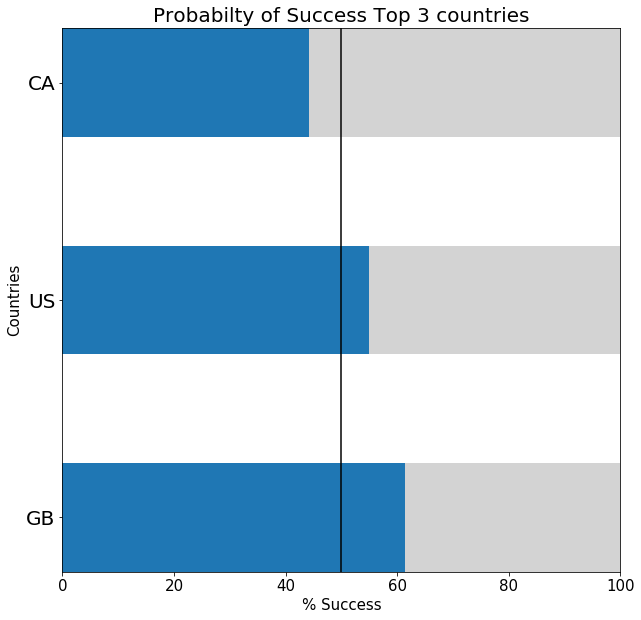

In [87]:
#Plot Probability of Success in the top 3 countries,

countrySuccess = list(countryProbSuccess_df['successful'])
countryUnsuccess = list(countryProbSuccess_df['unsuccessful'])
countryIndex = list(countryProbSuccess_df.index)

plt.figure(figsize = (10,10))

numberTicks = len(countryIndex)
tickLocations = np.arange(numberTicks)    
barWidth = 0.5     

plt.title('Probabilty of Success Top 3 countries', fontsize = 20)

p1 = plt.barh(countryIndex,
              countrySuccess,
              barWidth)
p2 = plt.barh(countryIndex,
              countryUnsuccess,
              barWidth,
              left = countrySuccess,
              color = 'lightgray')

plt.ylabel('Countries', fontsize = 15)
plt.yticks(tickLocations, countryIndex, fontsize = 20)

plt.xlabel('% Success', fontsize = 15)
plt.xticks(fontsize = 15)

plt.vlines(50, ymin = -0.25, ymax = numberTicks - 0.75, colors='k', linestyles = 'solid')

plt.xlim(0,100)
plt.ylim(-0.25, numberTicks - 0.75)

plt.show()


In [88]:
#Probablity of success by category in the top 3 countries.

#Filter countrires by using conditionals | (or)
categoryProbSuccess_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'Category', columns = 'state', values = 'Capped Funded', aggfunc = 'size', fill_value  = 0)

#lambda function calcualtes % of total and sorts values in descending order based on the succesful outcome. Axis = 1 to perform the operations per row.

categoryProbSuccess_df = categoryProbSuccess_pivot.apply(lambda x: round((x/x.sum() * 100),2), axis = 1).sort_values('successful', ascending = True)

categoryProbSuccess_df = categoryProbSuccess_df.loc[(categoryProbSuccess_df['successful'] != 0)] #Filters out category with 0 probability of success.

categoryProbSuccess_df

state,successful,unsuccessful
Category,,
food,18.58,81.42
technology,37.33,62.67
games,37.50,62.50
publishing,38.24,61.76
photography,44.79,55.21
film & video,58.66,41.34
theater,62.53,37.47
music,79.19,20.81


In [89]:
#Average capped funded per category in the top 3 countries.

categoryAvgCappedFund_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'Category', columns = 'state',values = 'Capped Funded', aggfunc = 'mean', fill_value  = 0)

#Sorts values in descending order based on the average capped funded succesful.
categoryAvgCappedFund_df = categoryAvgCappedFund_pivot#.sort_values('successful', ascending=True)

categoryAvgCappedFund_df = categoryAvgCappedFund_df.reindex(categoryProbSuccess_df.index) #Need to re index to make sure %funded and probabiity of success have the same index.

categoryAvgCappedFund_df

state,successful,unsuccessful
Category,,
food,1.501765,0.012584
technology,2.389459,0.110398
games,4.289948,0.042677
publishing,1.283237,0.043750
photography,1.472485,0.127807
film & video,1.176033,0.047094
theater,1.194541,0.111626
music,1.220167,0.080009


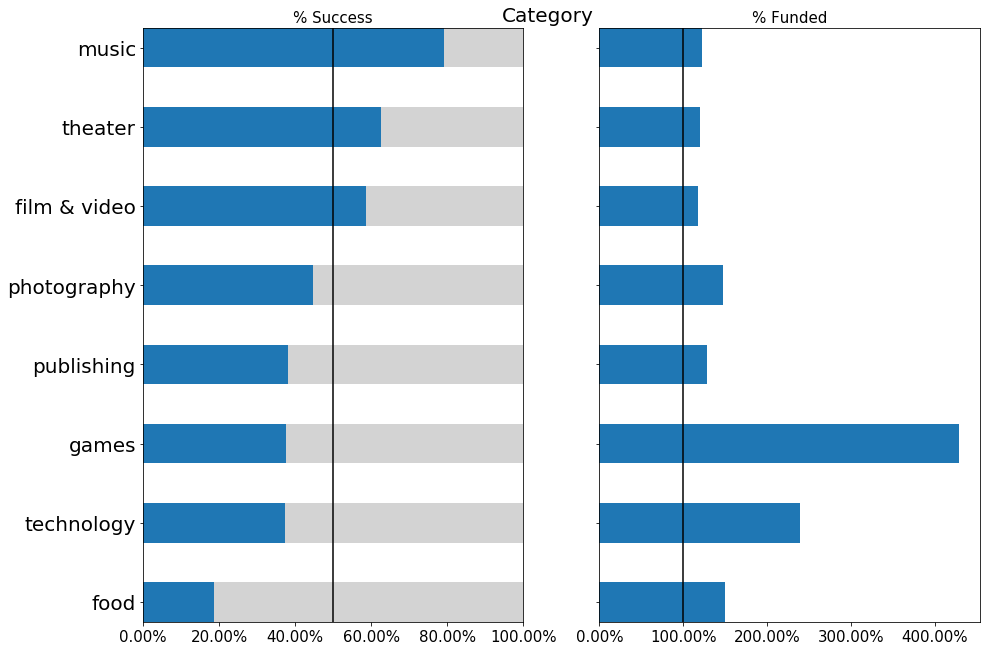

In [210]:
#Categories plot.

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,10), sharey = True)

fig.suptitle('Category', fontsize = 20)
fig.subplots_adjust(top=0.95) #fix space between charts and title.

successProbability = list(categoryProbSuccess_df['successful'])
unsuccessProbability = list(categoryProbSuccess_df['unsuccessful'])

Index = list(categoryProbSuccess_df.index)

numberTicks = len(Index)
tickLocations = np.arange(numberTicks)    
barWidth = 0.5       

#First Plot.
#For barstacked plot.
ax1.barh(Index,
         successProbability,
         barWidth)
ax1.barh(Index,
         unsuccessProbability,
         barWidth,
         left = successProbability,
         color = 'lightgray')
ax1.set_title('% Success', fontsize = 15)
ax1.set_xlim(0,100)
ax1.set_ylim(-0.25, numberTicks - 0.75)
ax1.tick_params(axis='y',
                which='major',
                labelsize = 20)
ax1.tick_params(axis='x',
                which='major',
                labelsize = 15)
#format.
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x / 100))) 
#vertical line ax1
ax1.vlines(50,
           ymin = -0.25,
           ymax = numberTicks - 0.75,
           colors='k',
           linestyles = 'solid')

#Second plot.
success_pctFunded = list(categoryAvgCappedFund_df['successful'])

ax2.barh(Index,
         success_pctFunded,
         barWidth)
ax2.set_title('% Funded', fontsize = 15)
ax2.set_xlim(0,max(categoryAvgCappedFund_df['successful'])+.25)
ax2.set_ylim(-0.25, numberTicks - 0.75)
ax2.tick_params(axis='x',
                which='major',
                labelsize = 15)
#format.
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x))) 
#Vertical line plot ax2
ax2.vlines(1, ymin = -0.25, ymax = numberTicks - 0.75, colors='k', linestyles = 'solid')

plt.show()


In [91]:
#Probablity of success by sub category in the top 3 countries.

#Filter countrires by using conditionals | (or)
subCategoryProbSuccess_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'Sub-Category', columns = 'state', values = 'Capped Funded', aggfunc = 'size', fill_value  = 0)

#lambda function calcualtes % of total and sorts values in descending order based on the succesful outcome. axis = 1 to perform operations per row.

subCategoryProbSuccess_df = subCategoryProbSuccess_pivot.apply(lambda x: round((x/x.sum() * 100),2), axis = 1).sort_values('successful', ascending=True)

subCategoryProbSuccess_df = subCategoryProbSuccess_df.loc[(subCategoryProbSuccess_df['successful']!=0)]

subCategoryProbSuccess_df

state,successful,unsuccessful
Sub-Category,,
wearables,10.91,89.09
musical,45.38,54.62
spaces,47.90,52.10
makerspaces,52.94,47.06
photobooks,63.70,36.30
plays,67.20,32.80
space exploration,67.31,32.69
indie rock,87.42,12.58
tabletop games,100.00,0.00


In [92]:
#Average capped funded per Sub - Category in the top 3 countries.

subCategoryAvgCappedFund_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'Sub-Category', columns = 'state',values = 'Capped Funded', aggfunc = 'mean', fill_value  = 0)

#Sorts values in descending order based on the average capped funded succesful.
subCategoryAvgCappedFund_df = subCategoryAvgCappedFund_pivot#.sort_values('successful', ascending=False) 

subCategoryAvgCappedFund_df = subCategoryAvgCappedFund_df.reindex(subCategoryProbSuccess_df.index) #Makes sure both % funded and probability of success have the same index order.
subCategoryAvgCappedFund_df

state,successful,unsuccessful
Sub-Category,,
wearables,0.941250,0.189694
musical,1.105424,0.121690
spaces,1.329437,0.095862
makerspaces,1.230000,0.263750
photobooks,1.472485,0.213878
plays,1.186306,0.113628
space exploration,1.864250,0.068235
indie rock,1.185324,0.188000
tabletop games,4.289948,0.000000


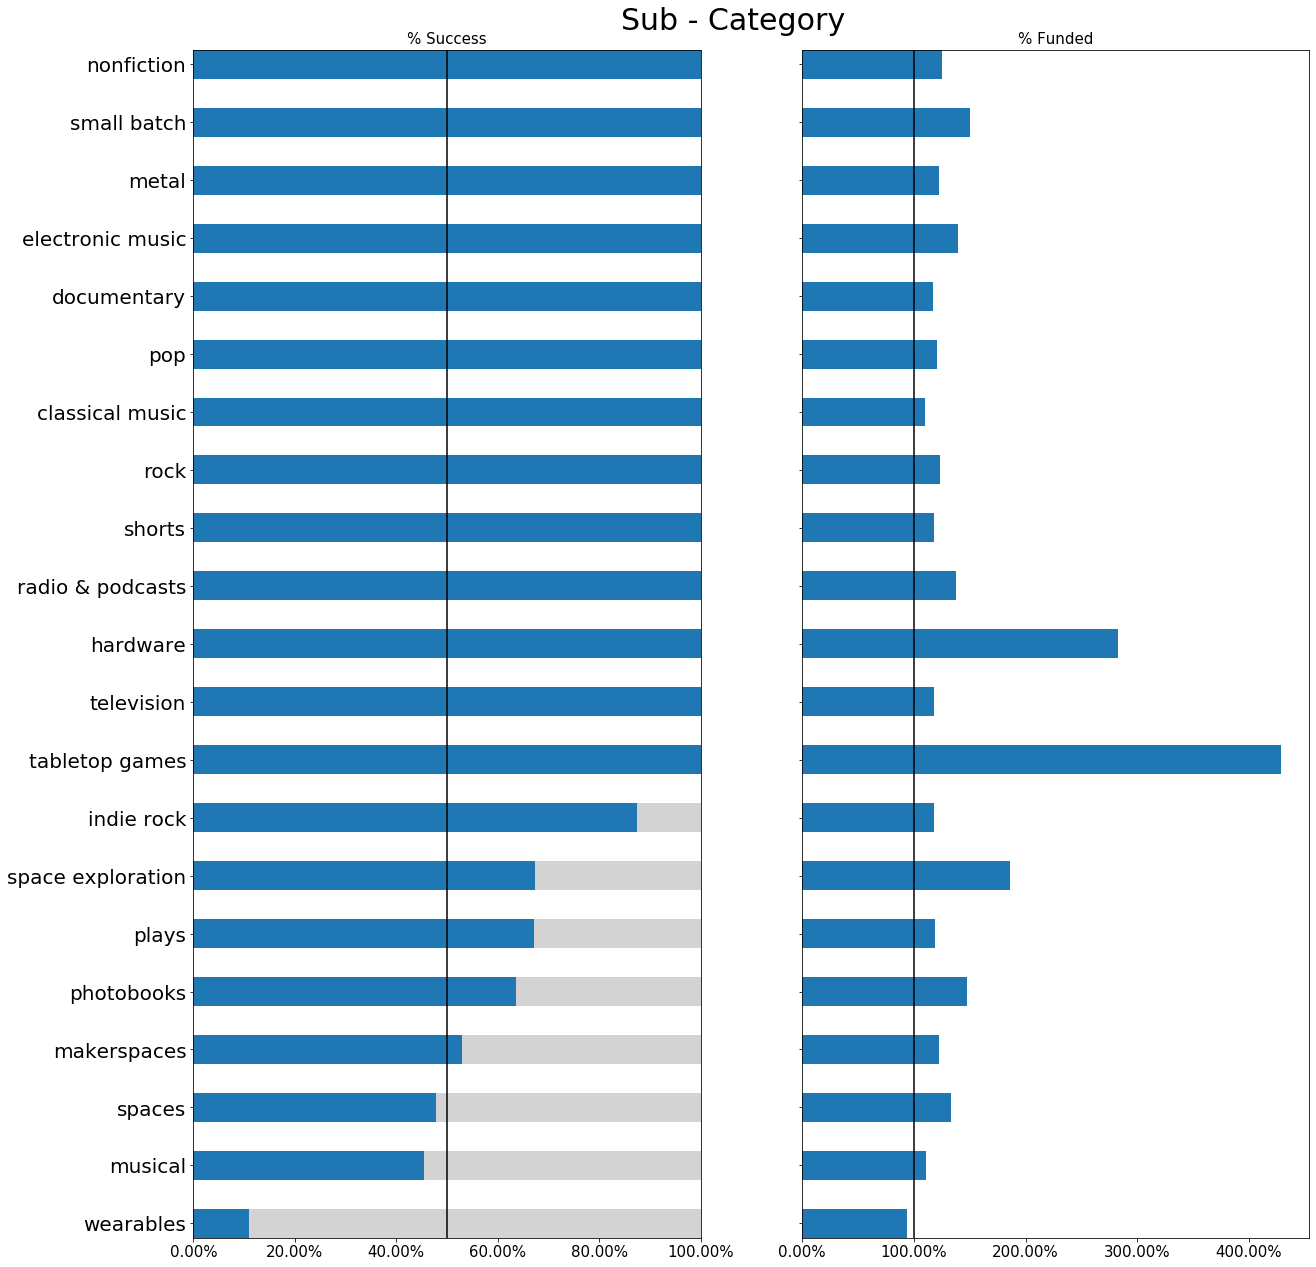

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20,20), sharey = True)

fig.suptitle('Sub - Category', fontsize = 30)
fig.subplots_adjust(top=0.95) #fix space between charts and title.

successProbability = list(subCategoryProbSuccess_df['successful'])
unsuccessProbability = list(subCategoryProbSuccess_df['unsuccessful'])

Index = list(subCategoryProbSuccess_df.index)

numberTicks = len(Index)
tickLocations = np.arange(numberTicks)    
barWidth = 0.5       

ax1.barh(Index, successProbability, barWidth)
ax1.barh(Index, unsuccessProbability, barWidth, left = successProbability, color = 'lightgray')
ax1.set_title('% Success', fontsize = 15)
ax1.set_xlim(0,100)
ax1.set_ylim(-0.25, numberTicks - 0.75)
ax1.tick_params(axis='y', which='major', labelsize = 20)
ax1.tick_params(axis='x', which='major', labelsize = 15)
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x / 100))) 

ax1.vlines(50, ymin = -0.25, ymax = numberTicks - 0.75, colors='k', linestyles = 'solid')

success_pctFunded = list(subCategoryAvgCappedFund_df['successful'])

ax2.barh(Index, success_pctFunded, barWidth)
ax2.set_title('% Funded', fontsize = 15)
ax2.set_xlim(0,max(categoryAvgCappedFund_df['successful'])+.25)
ax2.tick_params(axis='x', which='major', labelsize = 15)
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x))) 
ax2.set_ylim(-0.25, numberTicks - 0.75)


ax2.vlines(1, ymin = -0.25, ymax = numberTicks - 0.75, colors='k', linestyles = 'solid')

plt.show()

In [94]:
#Created a new column to store the string of the month data. to_datetime to convert object into datetime, .dt.month_name() to get the month's name

cappedKickstarted_df['Month'] = pd.to_datetime(cappedKickstarted_df['Deadline Date']).dt.month_name()


MonthlyDistribution_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], index = ['Month'] , columns = 'state', aggfunc = 'size', fill_value  = 0)

MonthlyDistribution_df = MonthlyDistribution_pivot.reindex(['January',
                                   'February',
                                   'March',
                                   'April',
                                   'May',
                                   'June',
                                   'July',
                                   'August',
                                  'September',
                                  'October',
                                  'November',
                                   'December'])

MonthlyDistribution_df

state,successful,unsuccessful
Month,,
January,119,131
February,143,124
March,198,141
April,175,116
May,199,133
June,212,124
July,216,150
August,190,179
September,151,147


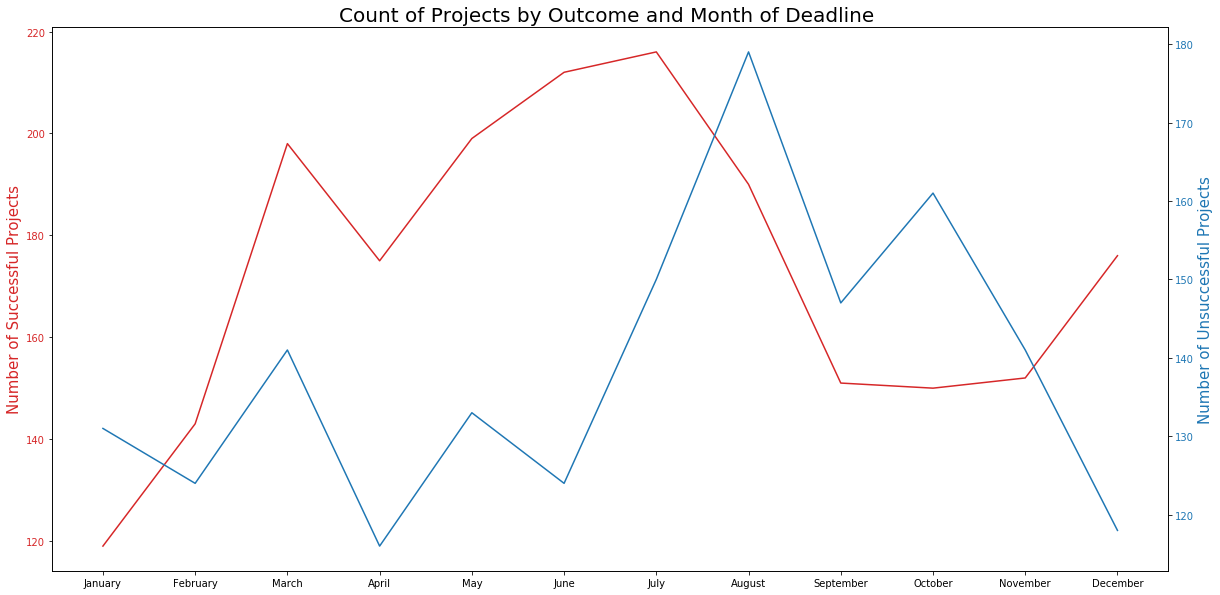

In [95]:

time = MonthlyDistribution_df.index
Data1 = MonthlyDistribution_df['successful']
Data2 = MonthlyDistribution_df['unsuccessful']

fig,  ax1 = plt.subplots(figsize = (20, 10)) #Controls the size of the whole plot and sets ax1 as the main y axis.

plt.title('Count of Projects by Outcome and Month of Deadline ', fontsize = 20) #Adds a title to the chart with font size.

color1 = 'tab:red' #color for axis 1 chart
#ax1.set_xlabel('Time (Weeks)', fontsize = 15) #X axis label and font size.
ax1.set_ylabel('Number of Successful Projects', color = color1, fontsize = 15) #Axis 1 Y label and font size/color
ax1.plot(time, Data1, color = color1) #Data for the X axis and Y axis
ax1.tick_params(axis = 'y', labelcolor = color1) #Parameters for y axis
ax1.grid(False) #Turns the grid off.
 
#Controls the secondary y axis.
ax2 = ax1.twinx()  #Initiates a second axes that shares the same X axis

color2 = 'tab:blue'
ax2.set_ylabel('Number of Unsuccessful Projects', color = color2, fontsize = 15)  # 2nd Y axis label color and font size
ax2.plot(time, Data2, color = color2) #X a Y data with the accigned color.
ax2.tick_params(axis= 'y' , labelcolor = color2)
ax2.grid(False)

plt.show() #Shows the plot.


In [96]:
#Probability of success and spotlight.

#Filter countrires by using conditionals | (or)
spotlightProbSuccess_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'spotlight',
                                            columns = 'state',
                                            aggfunc = 'size',
                                            fill_value  = 0)

#lambda function calcualtes % of total and sorts values in descending order based on the succesful outcome. axis = 1 to perform operations per row.

spotlightProbSuccess_pivot.apply(lambda x: round((x/x.sum() * 100),2), axis = 1).sort_values('successful', ascending=False)

state,successful,unsuccessful
spotlight,,
True,100.0,0.0
False,0.0,100.0


In [97]:
#

#Filter countrires by using conditionals | (or)
staffPickProbSuccess_pivot = pd.pivot_table(cappedKickstarted_df[(cappedKickstarted_df['country'] == 'US') | (cappedKickstarted_df['country'] == 'GB') | (cappedKickstarted_df['country'] == 'CA')], 
                                            index = 'staff_pick',
                                            columns = 'state',
                                            aggfunc = 'size',
                                            fill_value  = 0)

#lambda function calcualtes % of total and sorts values in descending order based on the succesful outcome. axis = 1 to perform operations per row.

staffPickProbSuccess_pivot.apply(lambda x: round((x/x.sum() * 100),2), axis = 1).sort_values('successful', ascending=False)

state,successful,unsuccessful
staff_pick,,
True,88.44,11.56
False,50.26,49.74


In [98]:
#Average doantion and average backers per category for sucesful campaigns,.

categoryAvgDonation_pivot = pd.pivot_table(cappedKickstarted_df,
                                           index = 'Category',
                                           columns = 'state',
                                           values =['Average Donation' ,'Capped Backers'],
                                           aggfunc = 'mean',
                                           fill_value  = 0)

#stack separates the rows in succesful and unsucesful, query filters only the rows that are succesful. 
categoryAvgDonationSuccess_df = categoryAvgDonation_pivot.stack().query('state == ["successful"]')

#Unstack returns the original multilayered DataFrame
categoryAvgDonationSuccess_df = categoryAvgDonationSuccess_df.unstack()

#use .loc() to show rows if at least 1 of the values in the row are different than 0 by using .any(1) 
categoryAvgDonationSuccess_df = categoryAvgDonationSuccess_df.loc[(categoryAvgDonationSuccess_df!=0).any(1)]

categoryAvgDonationSuccess_df

,Average Donation,Capped Backers
state,successful,successful
Category,,
film & video,106.714600,151.656667
food,90.900588,209.801471
games,67.263750,411.992188
music,73.287611,69.828241
photography,99.169126,158.190534
publishing,75.239000,158.828125
technology,158.741388,424.452751
theater,86.111156,55.584625


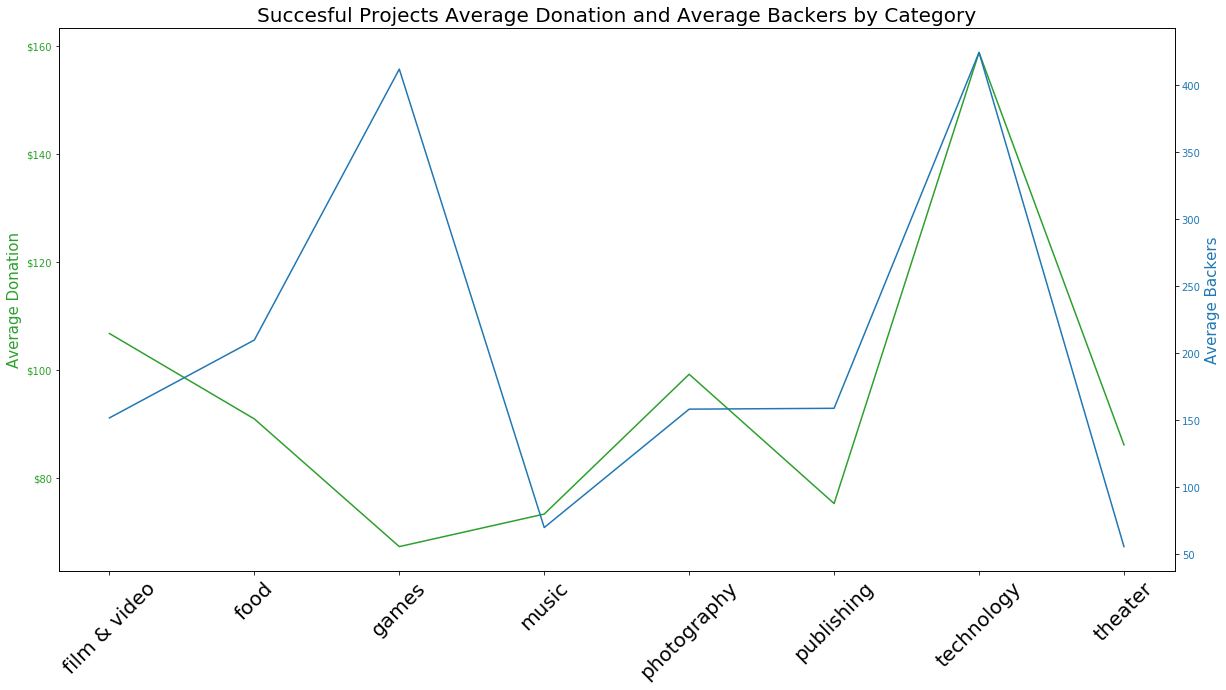

In [99]:
x_axis = np.arange(len(categoryAvgDonationSuccess_df))
ticks_loc = [i for i in x_axis]

time = categoryAvgDonationSuccess_df.index
Data1 = categoryAvgDonationSuccess_df['Average Donation']
Data2 = categoryAvgDonationSuccess_df['Capped Backers']

fig,  ax1 = plt.subplots(figsize = (20, 10)) #Controls the size of the whole plot and sets ax1 as the main y axis.

plt.xticks(ticks_loc, categoryAvgDonationSuccess_df.index, rotation="45", fontsize = 20)

plt.title('Succesful Projects Average Donation and Average Backers by Category', fontsize = 20) #Adds a title to the chart with font size.

color1 = 'tab:green' #color for axis 1 chart
#ax1.set_xlabel('Time (Weeks)', fontsize = 15) #X axis label and font size.
ax1.set_ylabel('Average Donation',
               color = color1,
               fontsize = 15) #Axis 1 Y label and font size/color
ax1.plot(time,
         Data1,
         color = color1) #Data for the X axis and Y axis
ax1.tick_params(axis = 'y', labelcolor = color1) #Parameters for y axis
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("${x:.0f}")) #Format
ax1.grid(False) #Turns the grid off.
 
#Controls the secondary y axis.
ax2 = ax1.twinx()  #Initiates a second axes that shares the same X axis

color2 = 'tab:blue'
ax2.set_ylabel('Average Backers', color = color2, fontsize = 15)  # 2nd Y axis label color and font size
ax2.plot(time, Data2, color = color2) #X a Y data with the accigned color.
ax2.tick_params(axis= 'y' , labelcolor = color2)
ax2.grid(False)

plt.show() #Shows the plot.

In [100]:
#Average doantion and average backers per Sub-Category for sucesful campaigns,.

subCategoryAvgDonation_pivot = pd.pivot_table(cappedKickstarted_df, 
                                            index = 'Sub-Category', columns = 'state', values =['Average Donation' ,'Capped Backers'], aggfunc = 'mean', fill_value  = 0)

#stack separates the rows in succesful and unsucesful, query filters only the rows that are succesful. 
subCategoryAvgDonationSuccess_df = subCategoryAvgDonation_pivot.stack().query('state == ["successful"]')

#Unstack returns the original multilayered DataFrame
subCategoryAvgDonationSuccess_df = subCategoryAvgDonationSuccess_df.unstack()

#use .loc() to show rows if at least 1 of the values in the row are different than 0 by using .any(1) 
subCategoryAvgDonationSuccess_df = subCategoryAvgDonationSuccess_df.loc[(subCategoryAvgDonationSuccess_df != 0).any(1)]

subCategoryAvgDonationSuccess_df

,Average Donation,Capped Backers
state,successful,successful
Sub-Category,,
classical music,91.276250,54.109375
documentary,109.557833,213.062500
electronic music,51.687500,87.109375
hardware,184.484714,548.166071
indie rock,70.649143,65.264286
makerspaces,133.513333,61.375000
metal,41.558500,88.993750
musical,100.557167,38.183333


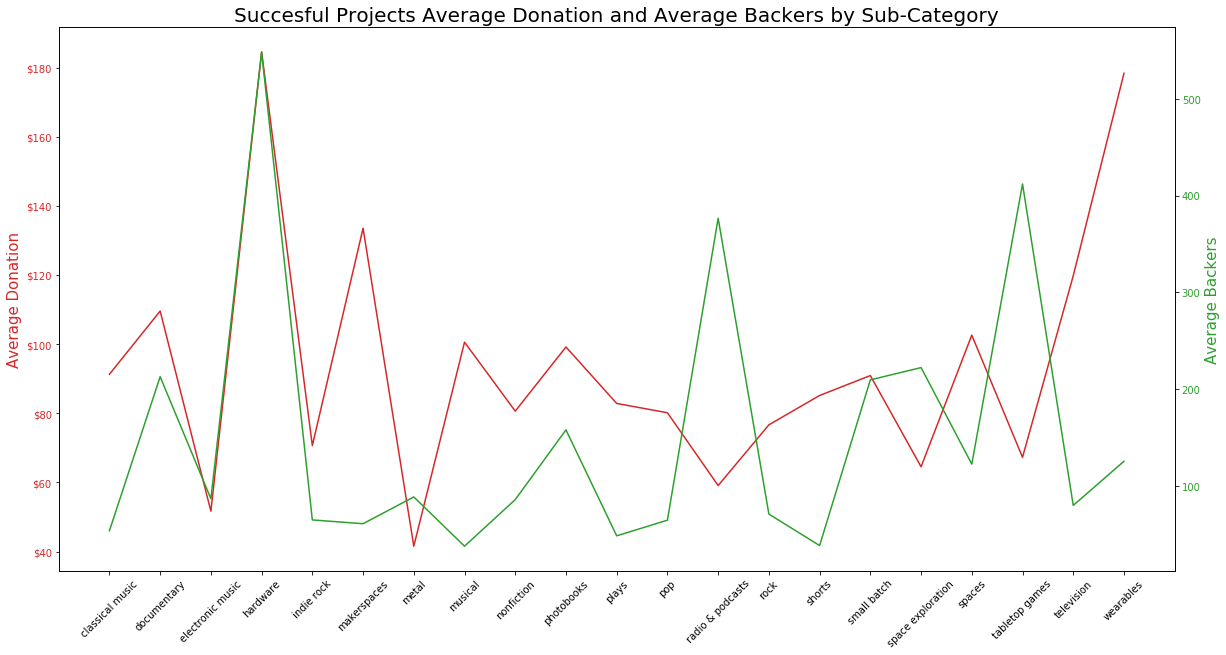

In [101]:
x_axis = np.arange(len(subCategoryAvgDonationSuccess_df))

ticks_loc = [i for i in x_axis]

time = subCategoryAvgDonationSuccess_df.index
Data1 = subCategoryAvgDonationSuccess_df['Average Donation']
Data2 = subCategoryAvgDonationSuccess_df['Capped Backers']

fig,  ax1 = plt.subplots(figsize = (20, 10)) #Controls the size of the whole plot and sets ax1 as the main y axis.

plt.title('Succesful Projects Average Donation and Average Backers by Sub-Category', fontsize = 20) #Adds a title to the chart with font size.

plt.xticks(ticks_loc, subCategoryAvgDonationSuccess_df.index, rotation="45", fontsize = 10)

color1 = 'tab:red' #color for axis 1 chart
#ax1.set_xlabel('Time (Weeks)', fontsize = 15) #X axis label and font size.
ax1.set_ylabel('Average Donation', color = color1, fontsize = 15) #Axis 1 Y label and font size/color
ax1.plot(time, Data1, color = color1) #Data for the X axis and Y axis
ax1.tick_params(axis = 'y', labelcolor = color1) #Parameters for y axis
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("${x:.0f}"))#Format
ax1.grid(False) #Turns the grid off.
 
#Controls the secondary y axis.
ax2 = ax1.twinx()  #Initiates a second axes that shares the same X axis

color2 = 'tab:green'
ax2.set_ylabel('Average Backers', color = color2, fontsize = 15)  # 2nd Y axis label color and font size
ax2.plot(time, Data2, color = color2) #X a Y data with the accigned color.
ax2.tick_params(axis= 'y' , labelcolor = color2)
ax2.grid(False)



plt.show() #Shows the plot.

In [102]:
#logistic regression -------------------------------------------------------------------------------------------------------------------------------------

cappedKickstarted_df.head()

,Category,Sub-Category,country,Deadline Date,Launched Date,Days on Platform,state,Pledged USD,Goal USD,backers_count,% Funded,Average Donation,spotlight,staff_pick,Capped Funded,Capped Backers,Goal Bins,Campaign Bins,Month
0,film & video,television,US,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49,successful,11633.00,8500.00,182,1.37,63.92,True,False,1.37,182.000,$5001 - $10000,31 days - 35 days,July
1,film & video,television,US,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00,successful,14653.00,10275.00,79,1.43,185.48,True,False,1.43,79.000,$10001 - $15000,26 days - 30 days,March
2,film & video,television,GB,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00,successful,659.84,628.42,35,1.05,18.85,True,False,1.05,35.000,<= $5000,6 days - 10 days,February
3,film & video,television,US,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00,successful,10390.00,10000.00,150,1.04,69.27,True,False,1.04,150.000,$5001 - $10000,26 days - 30 days,August
4,film & video,television,US,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00,successful,54116.28,44000.00,284,1.23,190.55,True,False,1.23,214.875,$40001 - $45000,26 days - 30 days,December


In [103]:
import math

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm

In [104]:
#Lets classify projects outcome by successfull = 1 and unsuccessful = 0

cappedKickstarted_df['Binary Outome'] = [ 1 if cappedKickstarted_df.iloc[i,6] == 'successful' else 0 for i in range(len(cappedKickstarted_df))]

#Change teh spotlight and staffpick to binary.

cappedKickstarted_df['Binary spotlight'] = [ 1 if cappedKickstarted_df.iloc[i,12] == True else 0 for i in range(len(cappedKickstarted_df))] #Columns spotlight and staff pick are classified as Bools so True cannot be in ''

cappedKickstarted_df['Binary staff_pick'] = [ 1 if cappedKickstarted_df.iloc[i,13] == True else 0 for i in range(len(cappedKickstarted_df))]

cappedKickstarted_df.head()

,Category,Sub-Category,country,Deadline Date,Launched Date,Days on Platform,state,Pledged USD,Goal USD,backers_count,...,spotlight,staff_pick,Capped Funded,Capped Backers,Goal Bins,Campaign Bins,Month,Binary Outome,Binary spotlight,Binary staff_pick
0,film & video,television,US,2015-07-23 03:00:00,2015-06-22 00:10:11,31 days 02:49:49,successful,11633.00,8500.00,182,...,True,False,1.37,182.000,$5001 - $10000,31 days - 35 days,July,1,1,0
1,film & video,television,US,2017-03-02 14:24:43,2017-01-31 14:24:43,30 days 00:00:00,successful,14653.00,10275.00,79,...,True,False,1.43,79.000,$10001 - $15000,26 days - 30 days,March,1,1,0
2,film & video,television,GB,2016-02-15 16:51:23,2016-02-05 16:51:23,10 days 00:00:00,successful,659.84,628.42,35,...,True,False,1.05,35.000,<= $5000,6 days - 10 days,February,1,1,0
3,film & video,television,US,2014-08-07 12:21:47,2014-07-08 12:21:47,30 days 00:00:00,successful,10390.00,10000.00,150,...,True,False,1.04,150.000,$5001 - $10000,26 days - 30 days,August,1,1,0
4,film & video,television,US,2015-12-19 20:01:19,2015-11-19 20:01:19,30 days 00:00:00,successful,54116.28,44000.00,284,...,True,False,1.23,214.875,$40001 - $45000,26 days - 30 days,December,1,1,0


In [105]:
#Data Preparation-----------------------------------------------------------------------------------------------------

#To avoid muticollinearity we will randomly drop a column from each of the dummies. 
np.random.seed(10)
remove_n = 1

#Create dummies for Categories, Subcategories and countries and randomly drop 1 column from each.
#category_dummies = pd.get_dummies(cappedKickstarted_df['Category'])
#drop_column = np.random.choice(category_dummies.columns, remove_n, replace=False)
#category_dummiesF = category_dummies.drop(['journalism'], axis = 1)

subCategory_dummies = pd.get_dummies(cappedKickstarted_df['Sub-Category'])
#drop_column = np.random.choice(subCategory_dummies.columns, remove_n, replace=False)
subCategory_dummiesF = subCategory_dummies.drop(['world music'], axis = 1)

month_dummies = pd.get_dummies(cappedKickstarted_df['Month'])
drop_column = np.random.choice(month_dummies.columns, remove_n, replace=False)
month_dummiesF = month_dummies.drop(['December'], axis = 1)

Convert days on platform from time delta to days float.
daysOnPlatform = cappedKickstarted_df['Days on Platform'].dt.total_seconds() / 86400




In [206]:
#Create a new Dataframe for the logistic regression by dropping all the categorical columns and the Binary Outcome because it will be our Y target. We only use variables that can affact the outcome. % funded is a result of the outcome so it is not included.

kickstarterLogisticRegression_df = cappedKickstarted_df[['Goal USD','Binary spotlight','Binary staff_pick']]

kickstarterLogisticRegression_df.head()

,Goal USD,Binary spotlight,Binary staff_pick
0,8500.00,1,0
1,10275.00,1,0
2,628.42,1,0
3,10000.00,1,0
4,44000.00,1,0


In [191]:
#Now we need to concat the dummies.

#dummies1 = pd.concat([category_dummiesF, subCategory_dummiesF],axis = 1) #Axis 1 to concat along the columns.

dummiesTotal = pd.concat([subCategory_dummiesF,month_dummiesF], axis = 1)

dummies_Days = pd.concat([dummiesTotal,daysOnPlatform],axis = 1)

In [192]:
#Concat the dummies and all the data that can be considered as factors to a sucessful or unsucesfull outcome. 
 
X = pd.concat([kickstarterLogisticRegression_df,dummies_Days], axis = 1)

X.head()

,Goal USD,Binary spotlight,Binary staff_pick,animation,art books,audio,children's books,classical music,documentary,drama,...,February,January,July,June,March,May,November,October,September,Days on Platform
0,8500.00,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,31.117928
1,10275.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,30.000000
2,628.42,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,10.000000
3,10000.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.000000
4,44000.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.000000


In [193]:
#Set up the Y which is the Target class .

Y = cappedKickstarted_df['Binary Outome']

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Binary Outome, dtype: int64

In [194]:
#To use Y in scikit learn we need to set Y as 1D array. (list)

Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0])

In [195]:
#Run logistic Regression ------------------------------------------------------------------------------------------

#Initiate the model.
log_model = LogisticRegression(max_iter = 500)

#Fit data
log_model.fit(X,Y)

#Check accuracy rating.
log_model.score(X,Y) #100% accuracy rating of predicting the successful outcome. 

0.9904035433070866

In [196]:
#Based on the Y mean --> just by calcualting the mean we have we have a 53% chance of having a succesfull project overall. Our model is predicting better than the average. 
Y.mean()

0.5376476377952756

In [204]:
#Show coefficents of the model

coefficient_df = pd.DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

coefficient_df.sort_values(1, ascending = False).head(60)

#Numbers higher than 1 are positively affecting the succesful outcome.
#By comparing to the Excel analysis, these coefficients are in agreedment with that analysis.

,0,1
1,Binary spotlight,[10.977765961472615]
2,Binary staff_pick,[2.2820892008500278]
27,plays,[1.3019477093490195]
31,rock,[1.2403320494394492]
8,documentary,[0.9839201561683467]
15,hardware,[0.8543193577358796]
16,indie rock,[0.5420601707754483]
37,tabletop games,[0.4094563835737815]
48,June,[0.36778233842048264]
38,television,[0.30389784865344005]


In [177]:
#Test and Train Data set (75% 25% split)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [178]:
#New log model

log_model2 = LogisticRegression()

#Fit the trainning sets.
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
#Use predict to predict classifincation labels for the next test set.

class_predict = log_model2.predict(X_test) #We took the model and we passed the X_test to try to predit Y.

array([0, 1, 1, ..., 1, 1, 1])

In [182]:
#Compare predicted classes with the actual test classes.

metrics.accuracy_score(Y_test, class_predict) #Perfect Prediction

1.0


In [212]:
cappedKickstarted_df['Sub-Category'].value_counts()

plays                1047
rock                  260
wearables             200
spaces                182
documentary           180
web                   160
indie rock            160
photobooks            160
musical               140
hardware              140
food trucks           140
animation             100
video games           100
drama                  80
tabletop games         80
shorts                 60
television             60
jazz                   60
space exploration      60
nonfiction             60
translations           57
mobile games           40
pop                    40
fiction                40
electronic music       40
science fiction        40
faith                  40
children's books       40
classical music        40
small batch            34
audio                  24
places                 20
people                 20
nature                 20
metal                  20
restaurants            20
art books              20
makerspaces            20
gadgets     